
# <div class="alert alert-block alert-info"> <span  style= "font-family: Times New Roman">Adaptive Boosting  </span> </div>

## Table of Contents
* [Import necessary libraries](#Import_necessary_libraries)
* [Data loading](#Data_loading)
* [Data Interpretation](#Data_Interpretation)
* [Data preprocessing](#Data_preprocessing)
* [Data Visualization](#Data_Visualization)
    * [Univariate Analysis](#univariate_analysis)
* [Automated EDA](#Automated_EDA)
    * [Dataprep](#dataprep)
    * [Pandas-profiling](#pandas_profiling)
    * [Sweetviz](#sweetviz)
* [Feature Engineering](#Feature_Engineering)
    * [Correlation](#correlation)
    * [Feature Scaling](#Feature_Scaling)
    * [Feature Importance](#Feature_Importance)
        * [Using Decision Tree](#decision_tree)
        * [Using Random Forest](#random_forest)
* [Model Building](#Model_Building)
* [Evaluation metrics](#Evaluation_metrics)
* [Decision boundaries](#Decision_boundaries)
* [Hyperparameter Tuning](#Hyperparameter_Tuning)

An ensemble is a composite model, combines a series of low performing classifiers with the aim of creating an improved classifier. Here, individual classifier vote and final prediction label returned that performs majority voting. Ensembles offer more accuracy than individual or base classifier. Ensemble methods can parallelize by allocating each base learner to different-different machines. Finally, you can say Ensemble learning methods are meta-algorithms that combine several machine learning methods into a single predictive model to increase performance. Ensemble methods can decrease variance using bagging approach, bias using a boosting approach, or improve predictions using stacking approach.

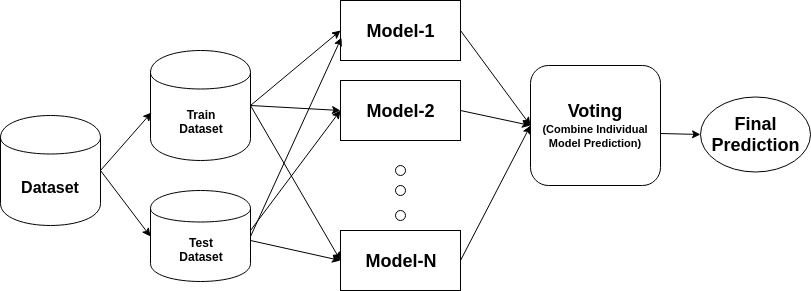

1. **Bagging** stands for bootstrap aggregation. 
It combines multiple learners in a way to reduce the variance of estimates. For example, random forest trains M Decision Tree, you can train M different trees on different random subsets of the data and perform voting for final prediction. Bagging ensembles methods are Random Forest and Extra Trees.
2.**Boosting algorithms** are a set of the low accurate classifier to create a highly accurate classifier. 
Low accuracy classifier (or weak classifier) offers the accuracy better than the flipping of a coin. Highly accurate classifier( or strong classifier) offer error rate close to 0. Boosting algorithm can track the model who failed the accurate prediction. Boosting algorithms are less affected by the overfitting problem. The following three algorithms have gained massive popularity in data science competitions.
- **AdaBoost (Adaptive Boosting)**
- **Gradient Tree Boosting**
- **XGBoost**
- **Light GBM**
- **CatBoost**

3. **Stacking(or stacked generalization)** is an ensemble learning technique that combines multiple base classification models predictions into a new data set. This new data are treated as the input data for another classifier. This classifier employed to solve this problem. Stacking is often referred to as blending.

The basic concept behind Adaboost is to set the weights of classifiers and training the data sample in each iteration such that it ensures the accurate predictions of unusual observations.



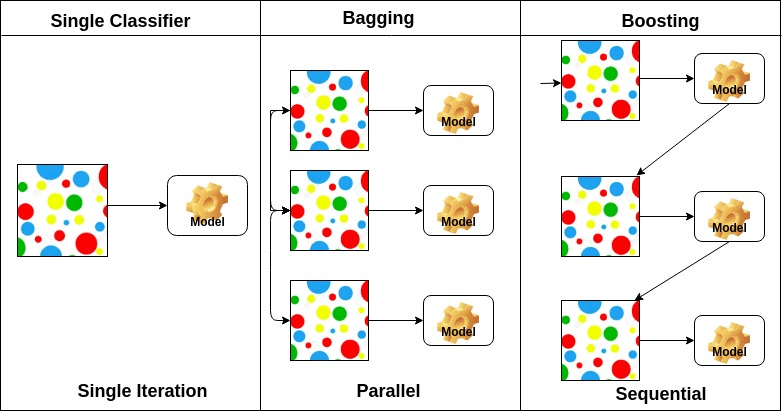

## How does AdaBoost Work?

Initially, Adaboost selects a training subset randomly.
- It iteratively trains the AdaBoost machine learning model by selecting the training set based on the accurate prediction of the last training.
- It assigns the **higher weight to wrong classified observations** so that in the next iteration these observations will get the high probability for classification.
- Also, It assigns the weight to the trained classifier in each iteration according to the accuracy of the classifier. The more accurate classifier will get high weight.
- This process iterate until the complete training data fits without any error or until reached to the specified maximum number of estimators.
- To classify, perform a "vote" across all of the learning algorithms you built.


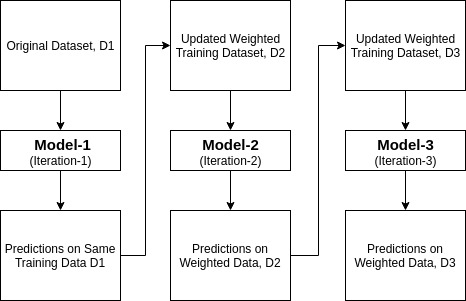

## **HYPERPARAMETERS**:
These are the four important hyperparameters:
 - **base_estimator**: It is a weak learner used to train the model. It uses DecisionTreeClassifier as default weak learner for training purpose. You can also specify different machine learning algorithms as well.

- **n_estimators**: Number of weak learners to train iteratively.

- **learning_rate**: It contributes to the weights of weak learners. It uses 1 as a default value.

- **max_depth** : Maximum Depth of each estimator should be speciified or tuned as it may leads to overfitting if it crosses the limit.

### **Pros**
- AdaBoost is easy to implement. It iteratively corrects the mistakes of the weak classifier and improves accuracy by combining weak learners. 
- You can use many base classifiers with AdaBoost as well.

### **Cons**
- AdaBoost is *sensitive to noise data*. It is highly affected by outliers because it tries to fit each point perfectly. AdaBoost is slower compared to XGBoost.

### <div class="alert alert-block alert-success"> <span  style= "font-family: Times New Roman">**Objective:** Predict the wine category based on the data given.  </span> </div>

##  <mark> <span  style= "font-family: Times New Roman">Importing necessary  libraries  </span> </mark> <a class="anchor" id="Import_necessary_libraries"></a>

### Lets see the functioning of the algorithm with an example:

Download dataset from here: 
To open this link <a href='https://drive.google.com/file/d/1MaXMTmcqPiQzG2m_OQdNvzJHZz0EHUee/view?usp=share_link' title='Google Drive'> Click here

In [1]:
# Basic Python libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Getting default style
plt.rcParams.update(plt.rcParamsDefault)

In [3]:
# Import warnings library and ignore them using this filter function
import warnings
warnings.filterwarnings('ignore')

In [1]:
# Plotting in notebook; If it is in colab; define 'colab'
import plotly.io as pio
pio.renderers.default='notebook'

In [4]:
# Import plotly libraries to use more predefined plots and animations
import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go
# Initiates the plotly interactive notebook mode 
# iplots are interactive plots means zoom,hover,toggle, such interactions can be easily done
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)

In [5]:
# Importing libraries for model building
from sklearn.metrics import classification_report,confusion_matrix,precision_score
from sklearn.metrics import recall_score,f1_score,roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn import metrics

In [6]:
# Importing AdaBoost Libraries
from sklearn.ensemble import AdaBoostClassifier

# For base estimators in AdaBoost 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier

# For feature importance 
from sklearn.ensemble import RandomForestClassifier

## <mark><span  style= "font-family: Times New Roman">Data Loading </span></mark> <a class="anchor" id="Data_loading"></a>

In [7]:
# Reading csv file
df = pd.read_csv('wine.csv')

In [8]:
# Display the data
df.head()

,wine,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## <mark> <span  style= "font-family: Times New Roman"> Data Interpretation  </span> </mark> <a class="anchor" id="Data_Interpretation"></a>

<mark>**We should understand all the variables before preprocessing it.** </mark><br>
- **Wine:** The output or the target, the category of the wine
- **Alcohol**: Alcohol or the primary basic content in the wine
- **Malic Acid**: Acid with `strong acidity` and apple aroma. We should check its correlation with categories
- **Ash**: Inorganic salt, which gives the `flavour to the wine`.
- **Alcalinity of ash**: It is the weak alkaline measure when dissolved in water as PH.
- **Magnesium**: Element which promote energy metabolism and weakly alkaline
- **Total Phenols**: Substances with polyphenols has bitter taste, affect taste and color of wine and has nutrients in wine
- **Flavanoids**: A beneficial `antioxidant for the heart and anti-aging`, rich in aroma and bitter
- **Nonflavanoid phenols**: A special aromatic gas with oxidation resistance and is weakly acidic. 
- **Proanthocyanins**: A bioflavanoid compound,also a natural antioxidant with a slight bitter smell. 
- **Color intensity**: Degree of color shade, also used to measure the style of wine to be `light` or `thick`. The color intensity is high, meanwhile the longer the wine and grape juice are in contact during the wine making process, the thicker the taste.
- **Hue**: vividness of the color and the degree of warmth and coldness. Also measures the variety and age of the wine.
- **Proline**: The main amino acid in red wine and an important part of the nutrition and flavor of wine. 
- **OD280/OD315 of diluted wines**: Optical density, Method for determining the `protein concentration` of various wines. 

##  <mark><span  style= "font-family: Times New Roman">Data preprocessing </span> </mark> <a class="anchor" id="Data_preprocessing"></a>

In [9]:
# Displays rows and columns count
df.shape

(178, 14)

In [10]:
# Counts the sum of all null values for every feature
df.isnull().sum()

wine                            0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [11]:
# Gives all the basic statistical results
# We can observe central tendency features along with standard deviation
# We can also estimate the approximate outlier analysis from this data
df.describe()

,wine,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [12]:
# We observe data types of all features and non-null count for every feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   wine                          178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [13]:
# Since there is only one categorical feature, Seeing the count of various categories of this features
df['wine'].value_counts()

2    71
1    59
3    48
Name: wine, dtype: int64

In [14]:
# We shall the names of the columns for ease.
df.rename(columns={'OD280/OD315 of diluted wines':'Optical density'},inplace=True)

#### <mark> These are no missing values and outliers as well. So, we need not perform Data Cleaning. </mark>

## <mark> <span  style= " font-family: Times New Roman"> Data Visualization  </span> </mark> <a class="anchor" id="Data_Visualization"></a>

### Lets use `matplotlib`, `seaborn` and `plotly` to perform `EDA` and `Visualization`

### <mark> <span style="color:#FF4701">Univariate Analysis</span> </mark> <a class="anchor" id="univariate_analysis"></a>

In [15]:
# A few color palette for aesthetic plots
# Check out all of them by individually executing them. 
# Remember, aesthetics also add an interesting point for the flow of work.
mesh_1 = ['#AEFFBE','#94FFF1','#FFE48A','#FF9EBE']
sns.color_palette(mesh_1)
colors = ['#FF5851', '#F3C130', '#414A6B', '#B49A85', '#1C1B20']
sns.color_palette(colors)
colors_1 = ['#1D4851','#9AB5BC','#FF9001','#FF4701']
sns.color_palette(colors_1)
colors_2 = ['#0D110F','#6F8C64','#FDD584','#2A4731']
sns.color_palette(colors_2)
colors_3 = ['#0B0B11','#8288C3','#242961','#D0BED4']
sns.color_palette(colors_3)
colors_4 = ['#645CAA','#A084CA','#BFACE0','#EBC7E8']
sns.color_palette(colors_4)

[(0.39215686274509803, 0.3607843137254902, 0.6666666666666666),
 (0.6274509803921569, 0.5176470588235295, 0.792156862745098),
 (0.7490196078431373, 0.6745098039215687, 0.8784313725490196),
 (0.9215686274509803, 0.7803921568627451, 0.9098039215686274)]

In [16]:
# Defining a function to plot Histogram, distribution plot and a boxplot
# Inputting the feature name and the color palette decided above.
def plot_data(column,clr):
    # figsize is given along with the rows=1 and columns=3
    fig,axes = plt.subplots(1,3,figsize=(18,5))
    # super title is given with fontsize
    fig.suptitle(column,fontsize=20,fontstyle='oblique')

    # Histogram is plotted, axes[0] gives the sequential plot number, color is given from the colors list
    sns.histplot(ax=axes[0],x=column,data=df,color=clr[1])
    # Title name is formatted with custom fontsize
    axes[0].set_title('Histogram of {}'.format(column),fontstyle='italic',fontsize=15,color='black')
    #axes[0].set_title('Histogram of {} \n std={:.4f} \n var={:.4f} \n skew={:.4f} \n kurtosis={:.4f}'.format(column,
     #                       df[column].std(),df[column].var(),df[column].skew(),df[column].kurtosis()),fontsize=15)
    
    
    # Distribution plot is plotted with axis label as column name 
    sns.distplot(ax=axes[1],x=df[column],axlabel=column,color=clr[0])
    # Title name of the distribution plot
    axes[1].set_title('Distribution of {}'.format(column),fontstyle='italic',fontsize=15,color='black')

    # Box plot is made to check the Inter Quartile range and the stats inferences
    sns.boxplot(ax=axes[2],x=column,data=df,color=clr[3])
    # Title of box plot is set and there it goes!! 
    axes[2].set_title('Boxplot of {}'.format(column),fontstyle='italic',fontsize=15,color='black')
    plt.show()

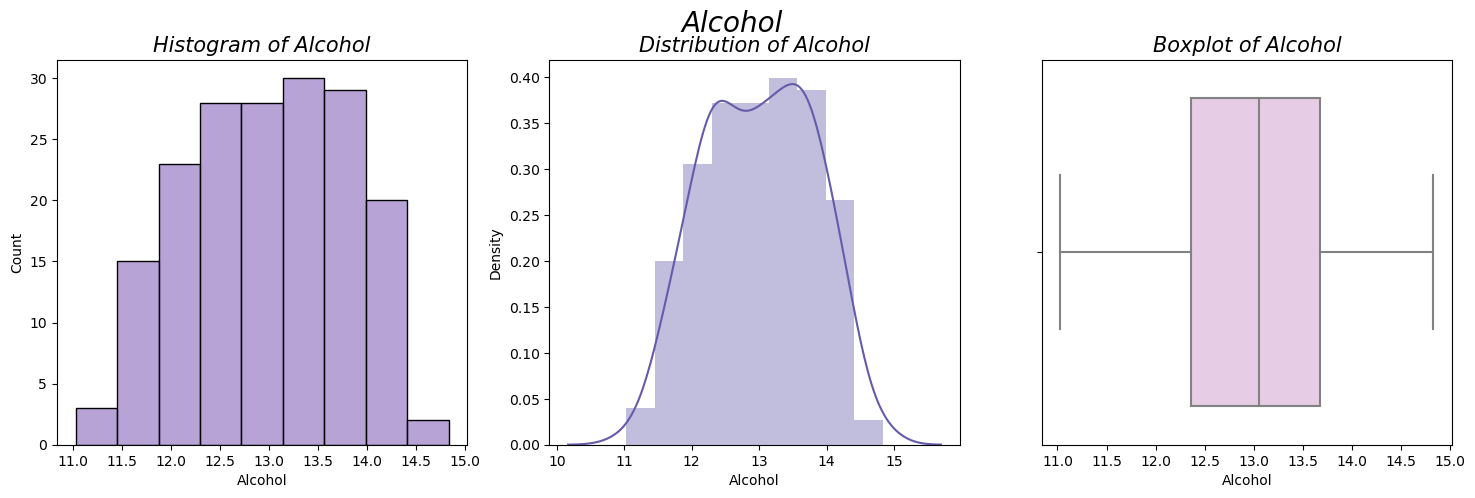

In [17]:
plot_data('Alcohol',colors_4)

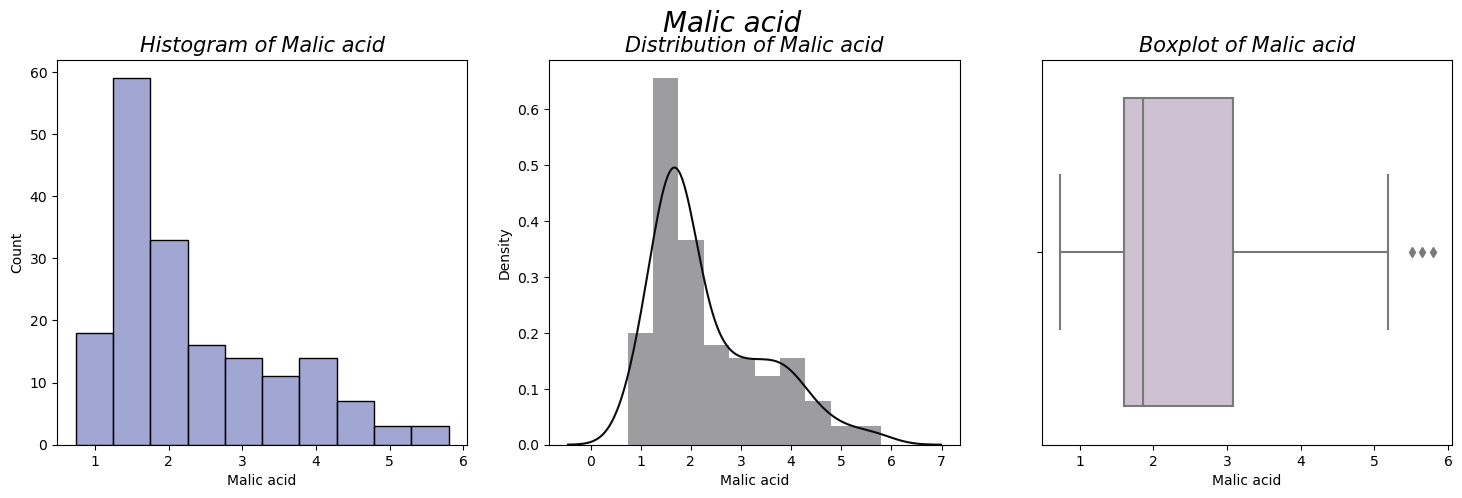

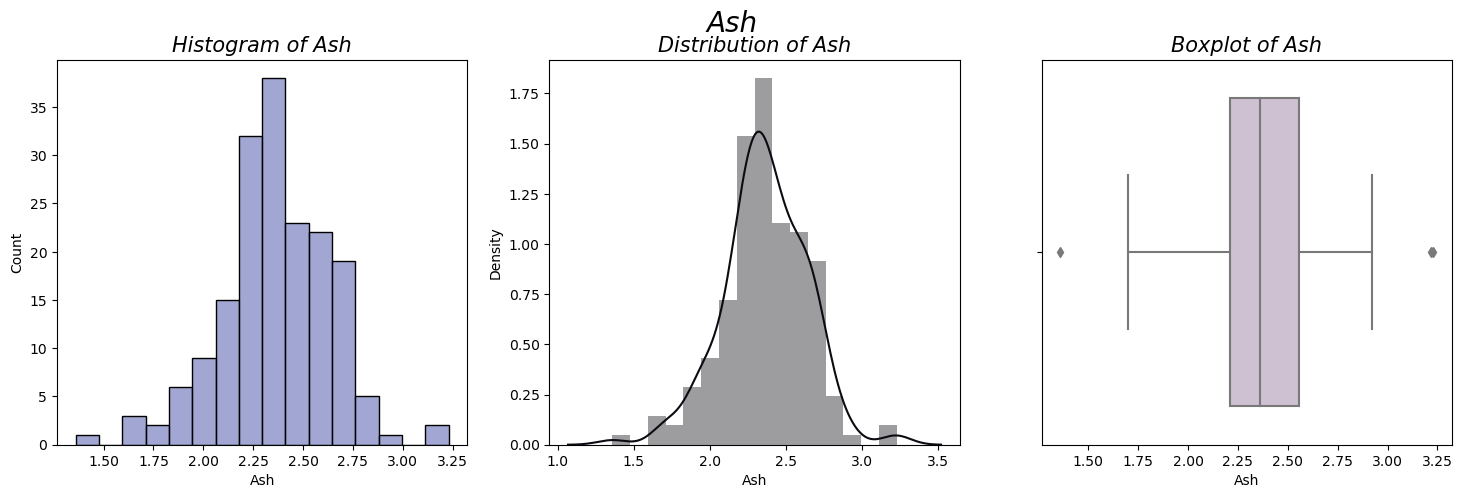

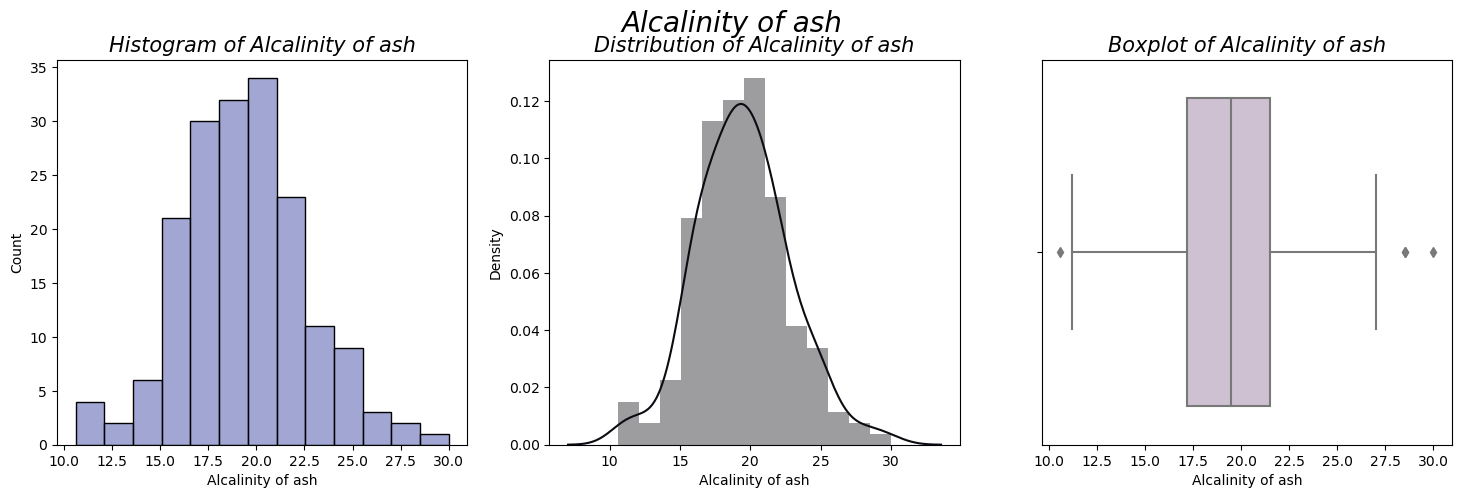

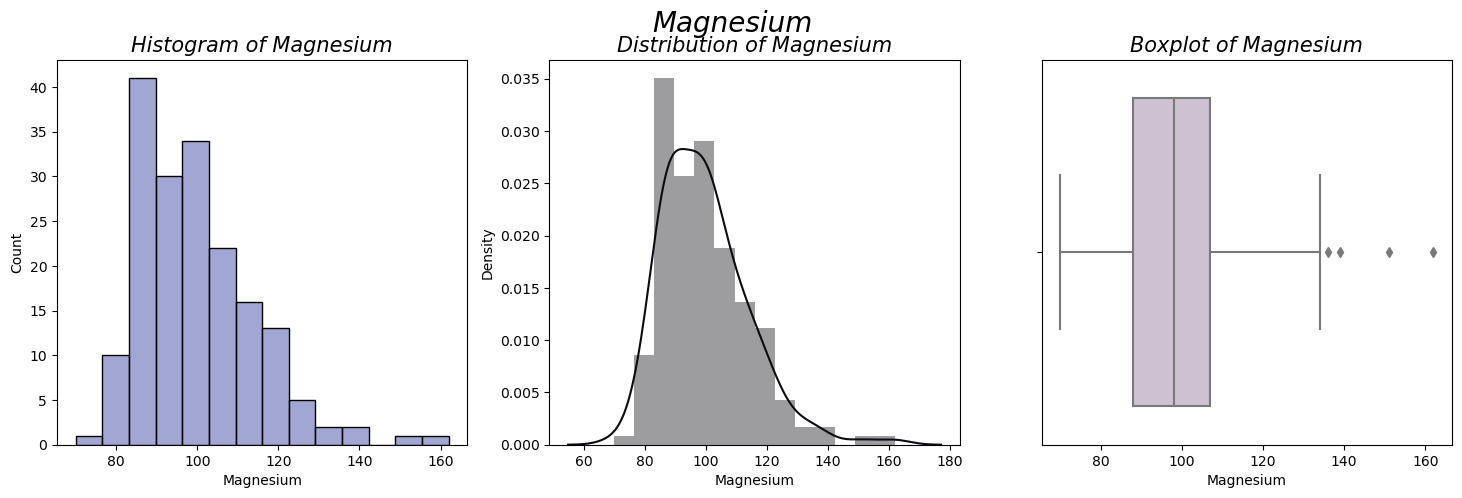

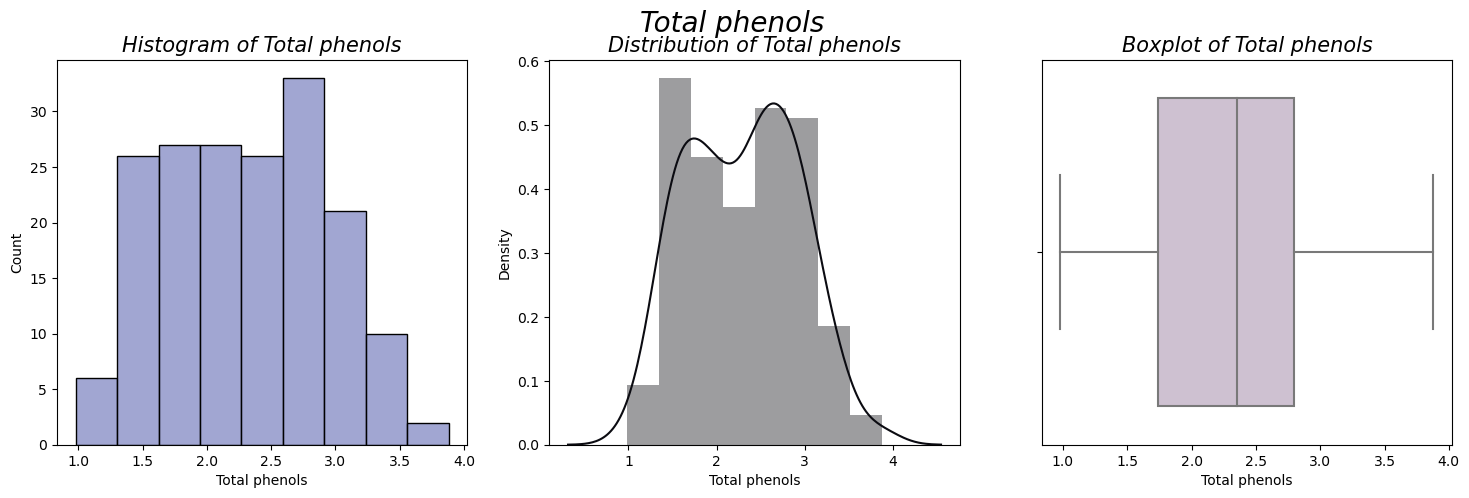

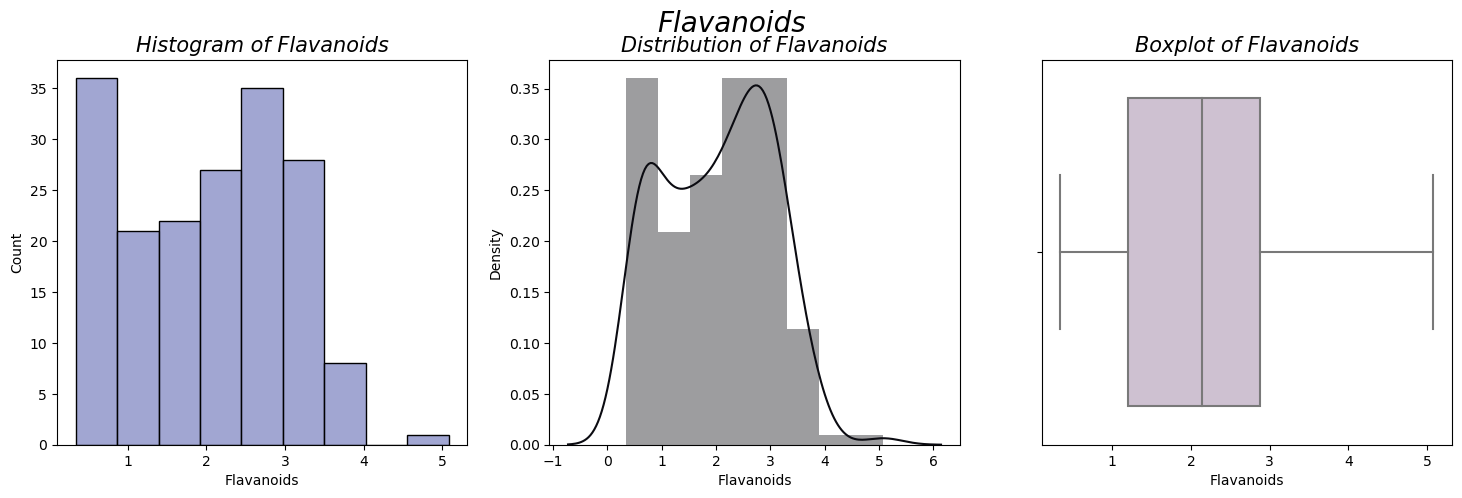

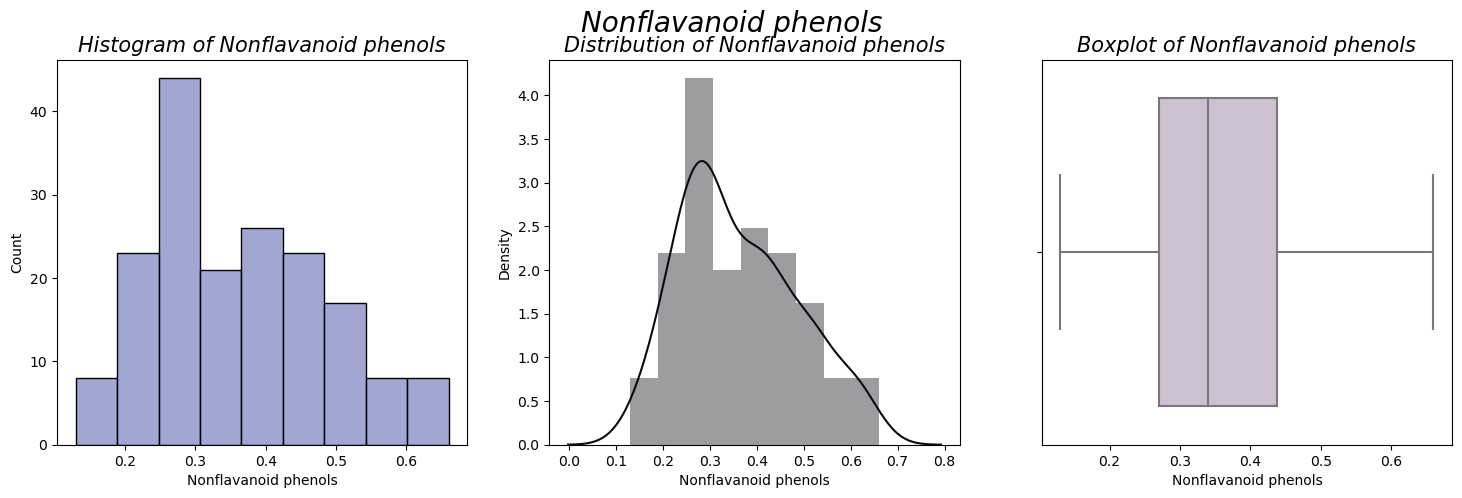

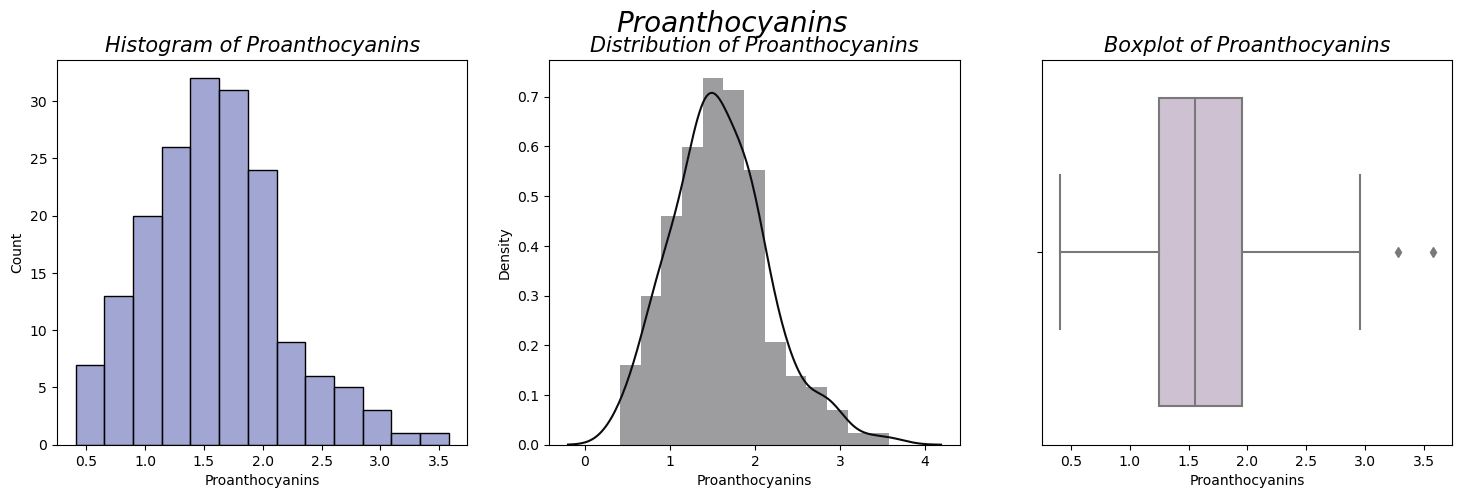

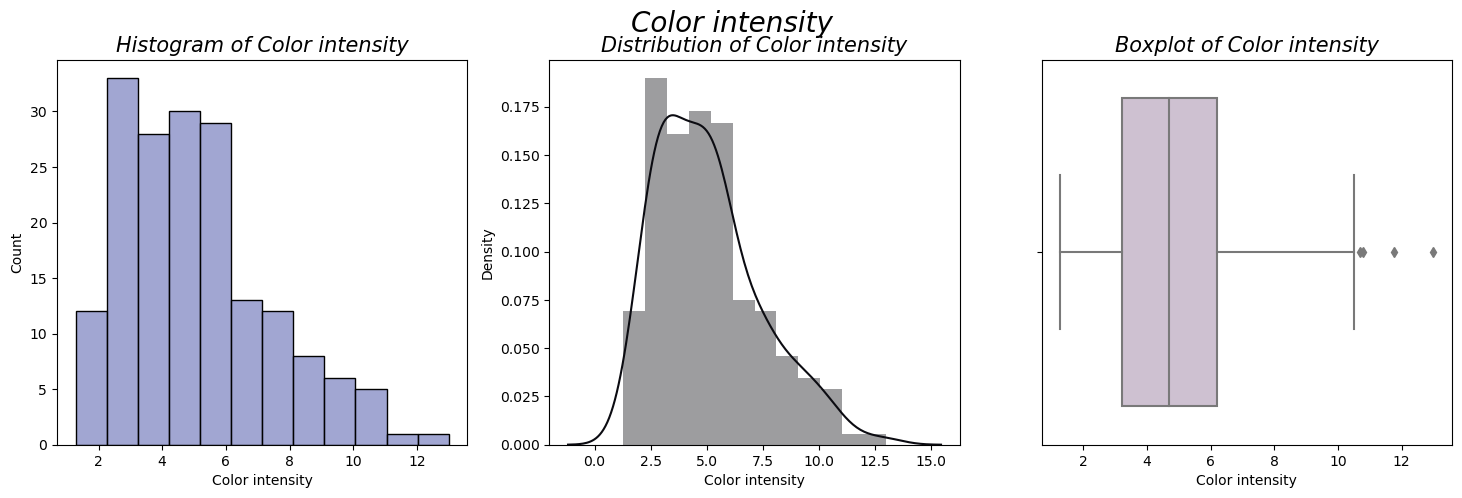

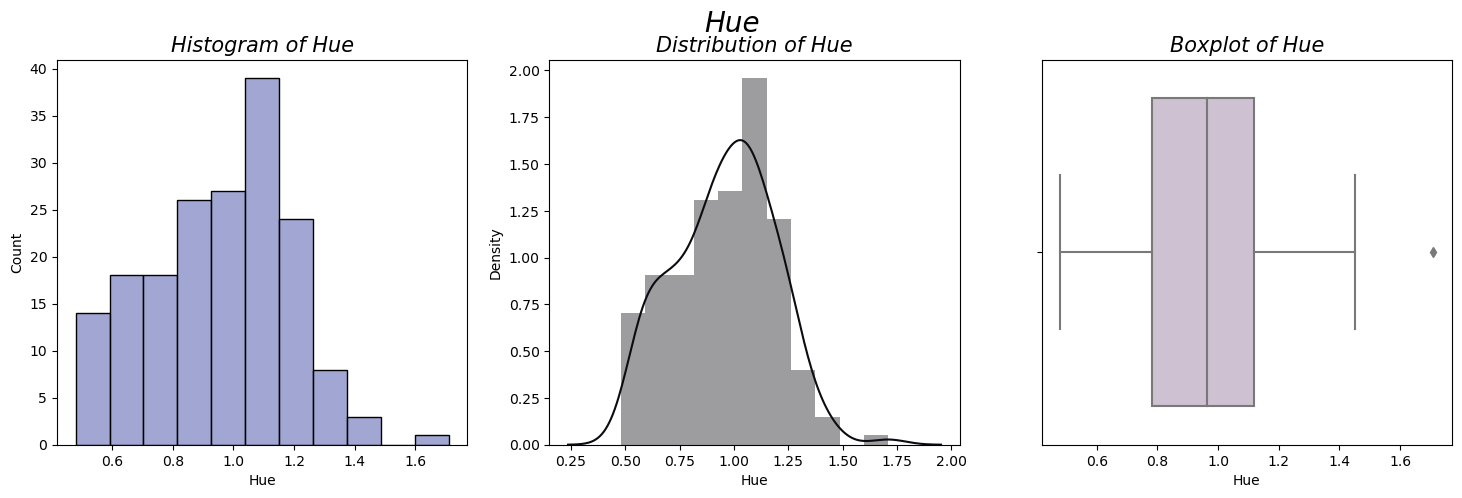

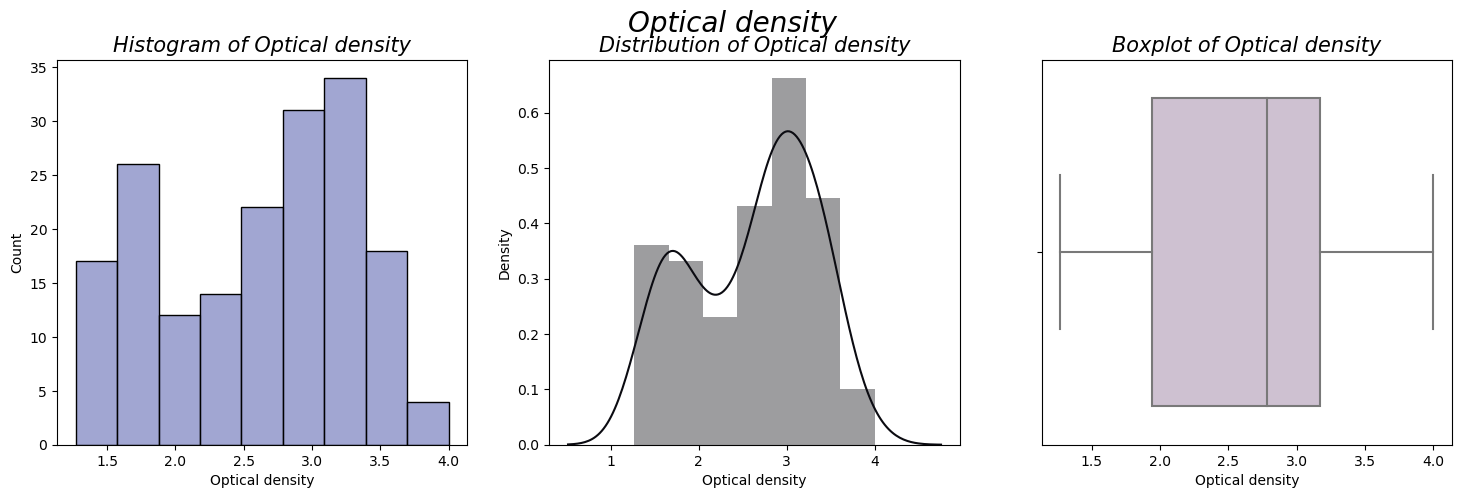

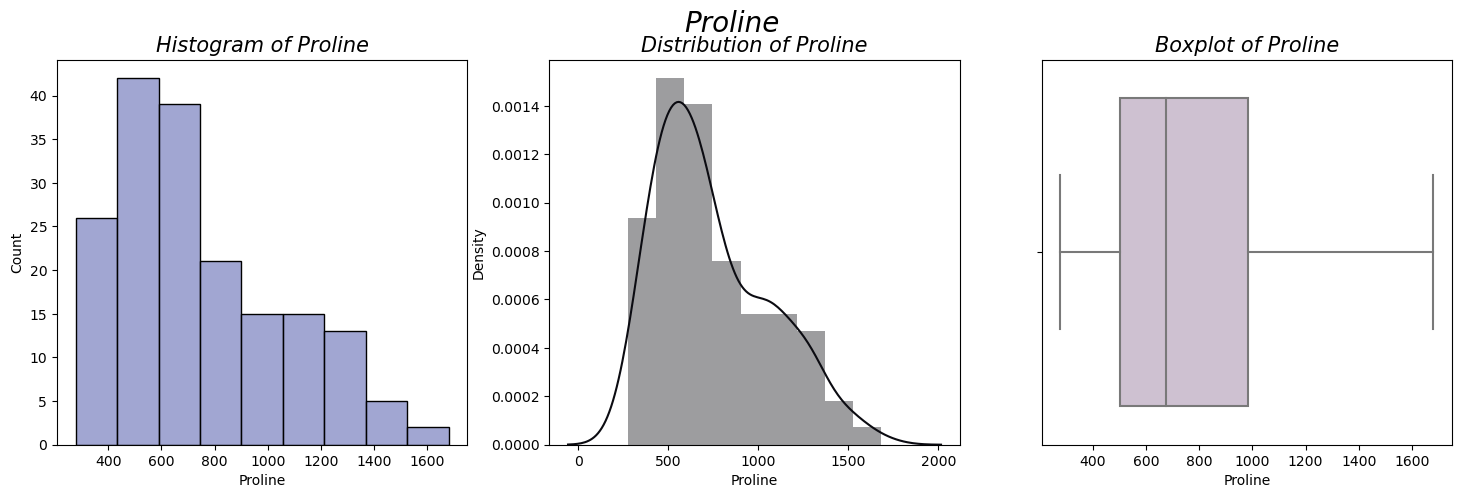

In [18]:
# List of columns to loop the plotting process.
# List of required columns to plot 
cols = ['Malic acid', 'Ash', 'Alcalinity of ash','Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
        'Proanthocyanins', 'Color intensity', 'Hue', 'Optical density','Proline']
#colors = ['colors','colors_1','colors_2','colors_3','colors_4','colors','colors_1','colors_2','colors_3','colors_4','colors','colors_1']
# Starting the for loop for plotting all feature data
for i in range(len(cols)):
    # Plotting the data for each feature with a color palette
    # Also, Take time to analyse each distribution and frame inferences
    # Note the intuition of mean, median and modes along with std, variance, skewness and kurtosis
    plot_data(cols[i],colors_3)

In [19]:
# Lets do the same with respect to output
# Defining a function to plot Histogram, distribution plot and a boxplot respective to output.
# Inputting the feature name and the color palette decided above.
def plot_data_wine(column):
    # figsize is given along with the rows=1 and columns=3
    fig,axes = plt.subplots(1,3,figsize=(18,5))
    # super title is given with fontsize
    fig.suptitle(column,fontsize=25,font="times new roman")

    # Histogram is plotted, axes[0] gives the sequential plot number, color is given from the colors list
    sns.histplot(ax=axes[0],x=column,hue='wine',data=df,palette='Purples')
    # Title name is formatted with custom fontsize
    axes[0].set_title('{} w.r.t wine'.format(column),fontsize=15)
    
    # Distribution plot is plotted with axis label as column name 
    sns.kdeplot(ax=axes[1],x=df[column],hue=df['wine'],label=column,palette='Blues_d')
    # Title name of the distribution plot (kde plot)
    axes[1].set_title('KDE of {} w.r.t to wine'.format(column),fontsize=15)

    # Box plot is made to check the Inter Quartile range and the stats inferences
    sns.violinplot(ax=axes[2],y=column,x='wine',data=df,palette='winter')
    # Title of box plot is set and there it goes!! 
    axes[2].set_title(' Violin {} w.r.t wine'.format(column),fontsize=15)
    plt.show()

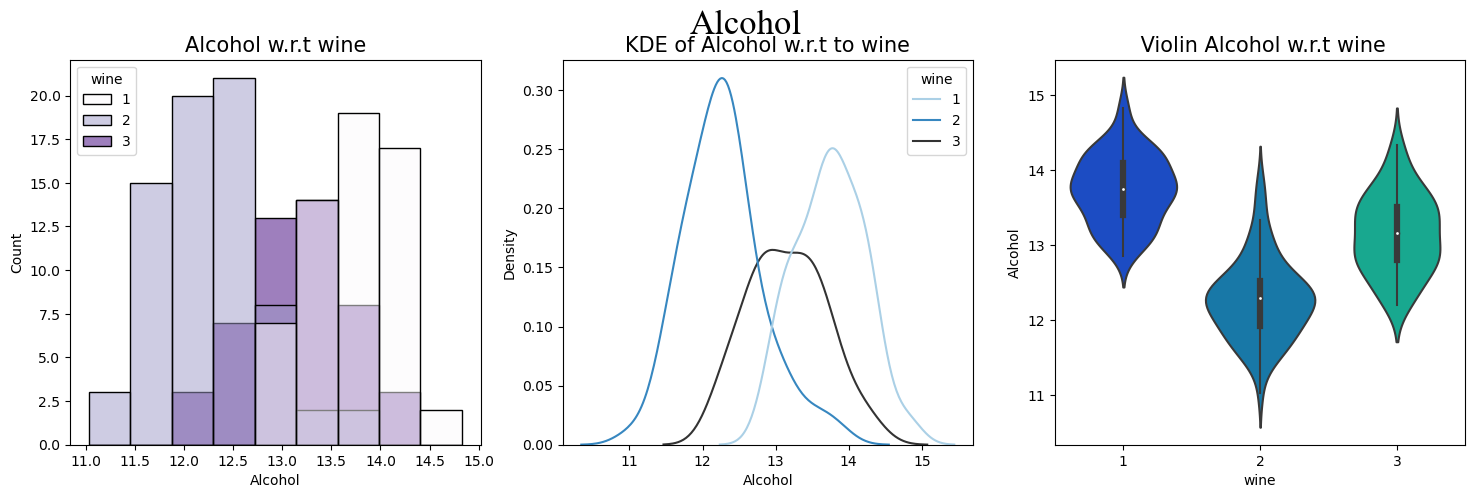

In [20]:
plot_data_wine('Alcohol')

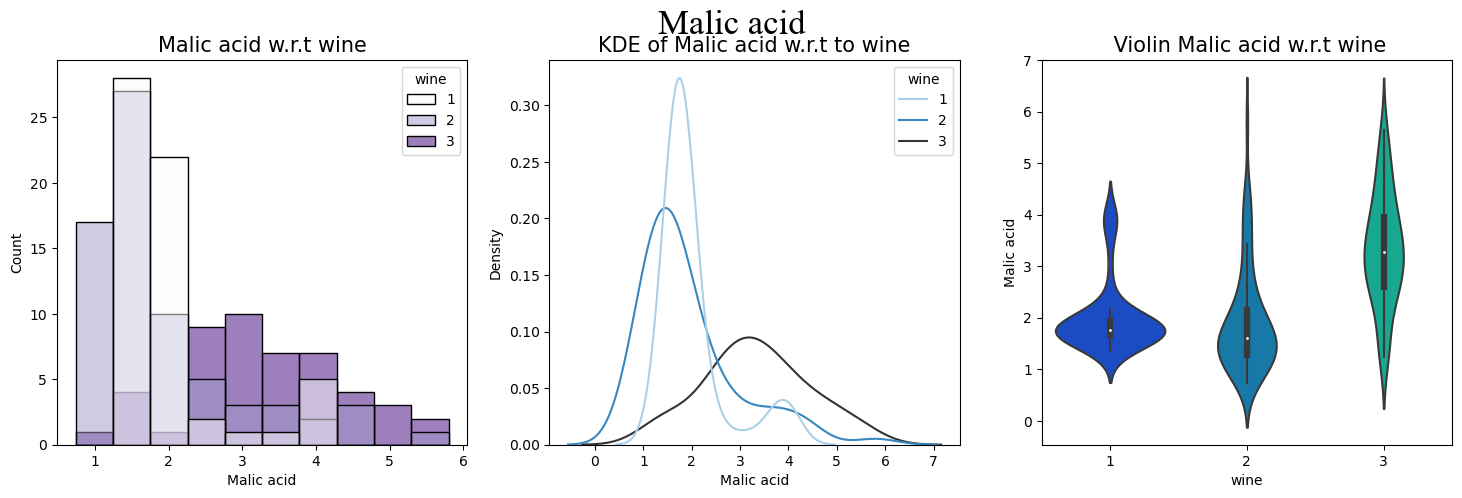

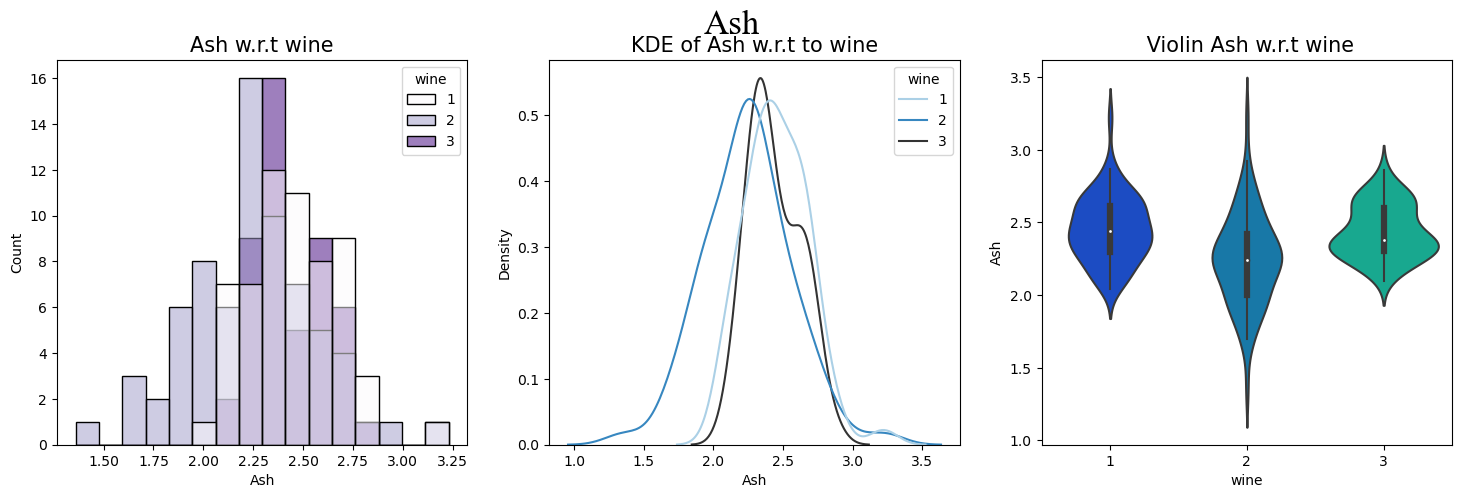

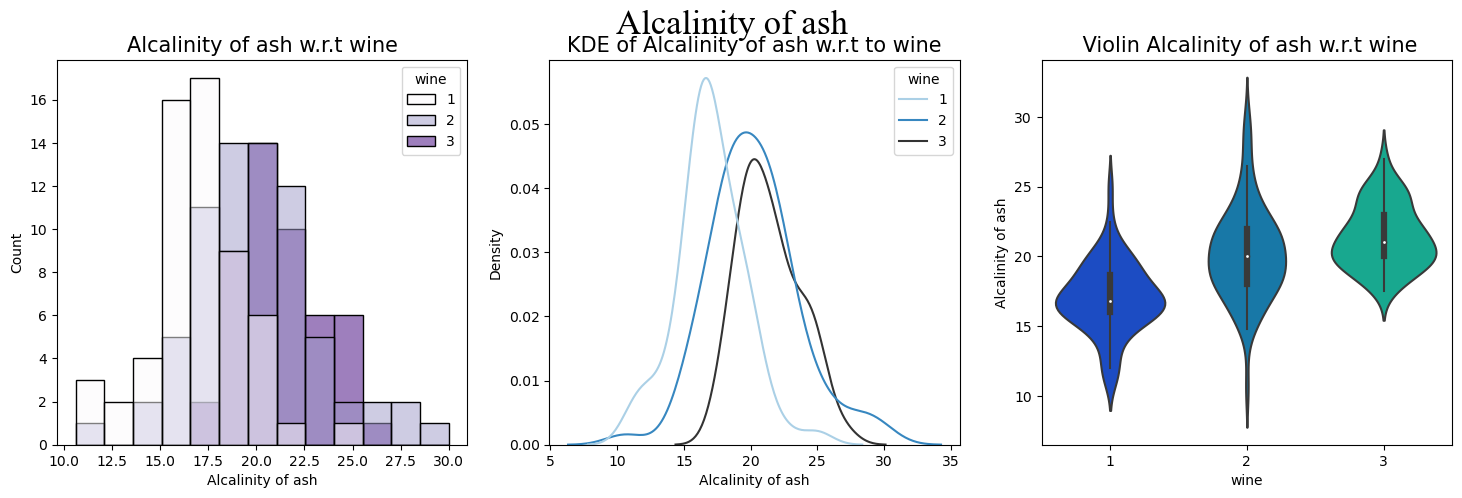

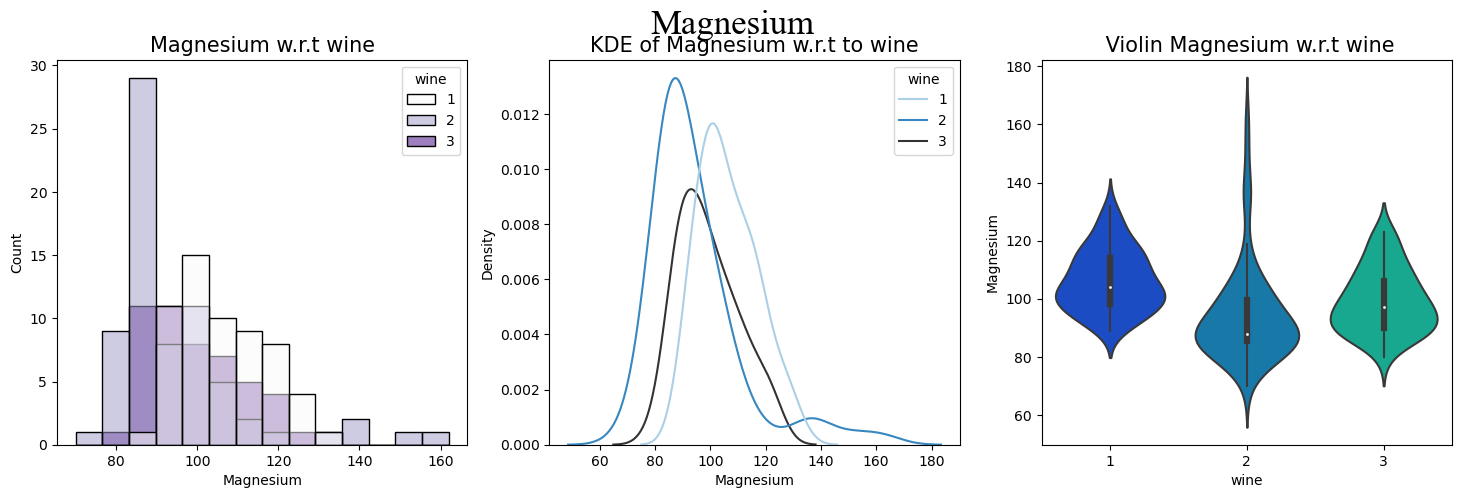

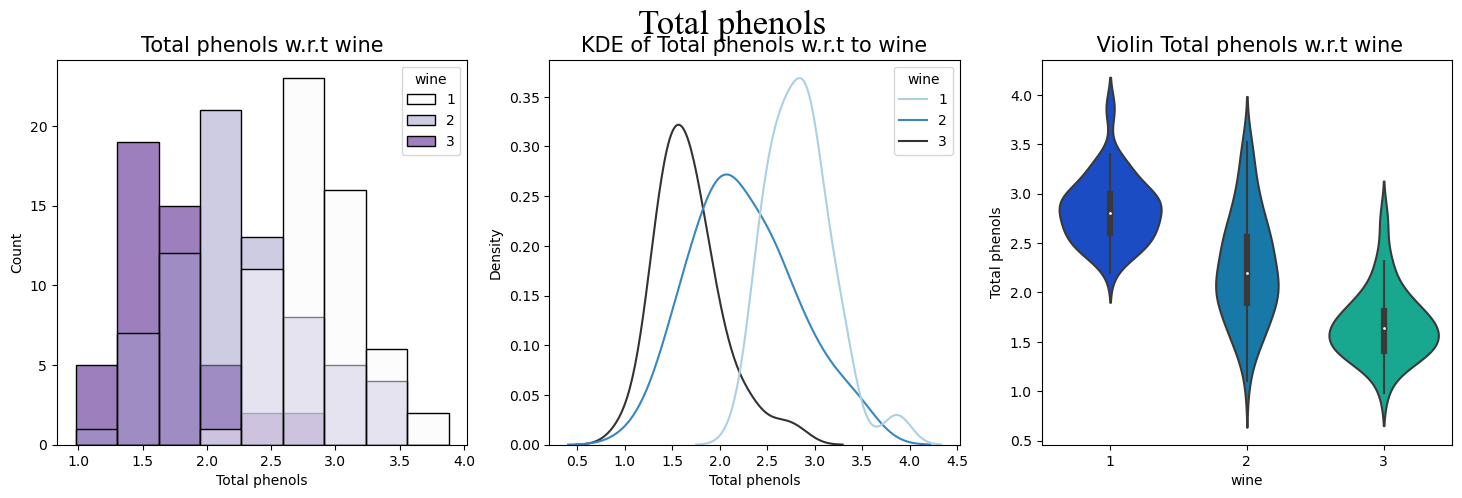

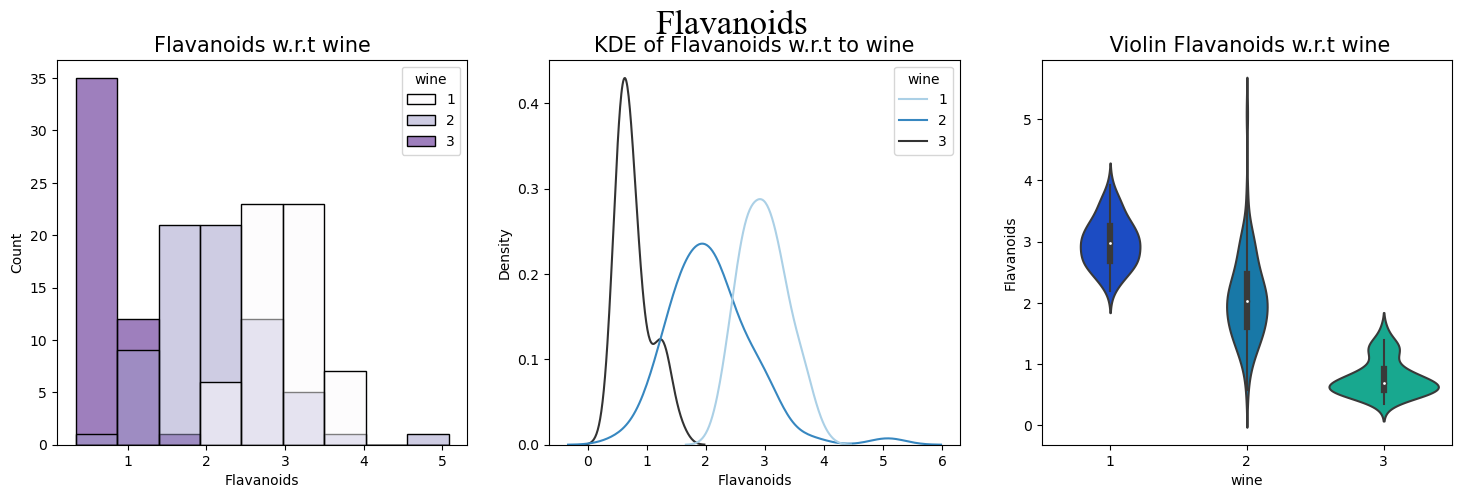

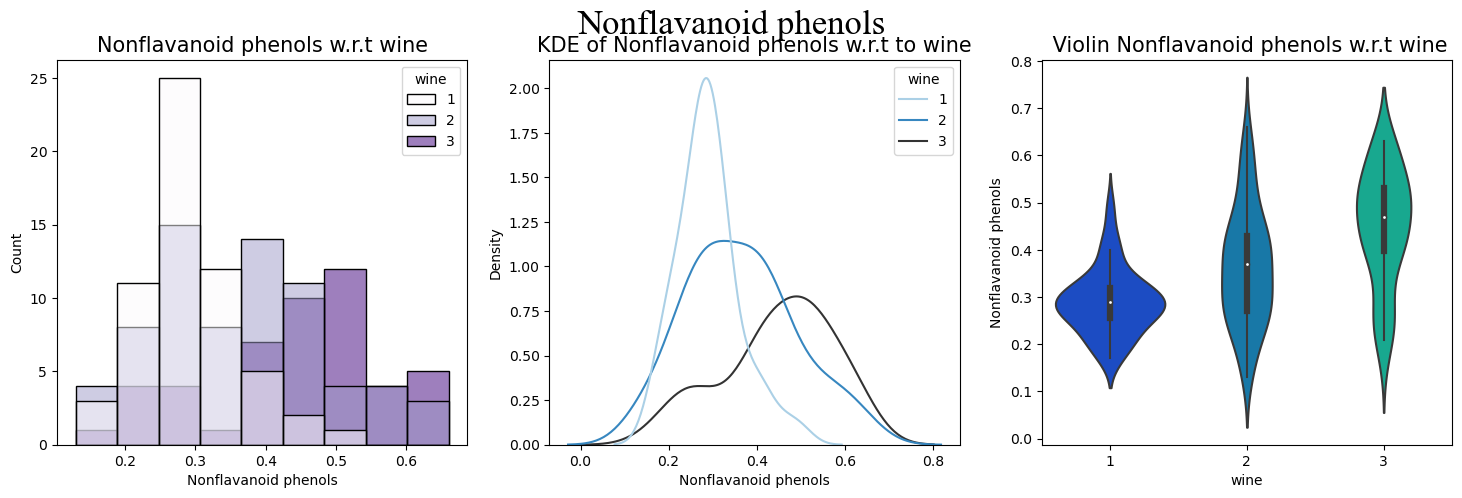

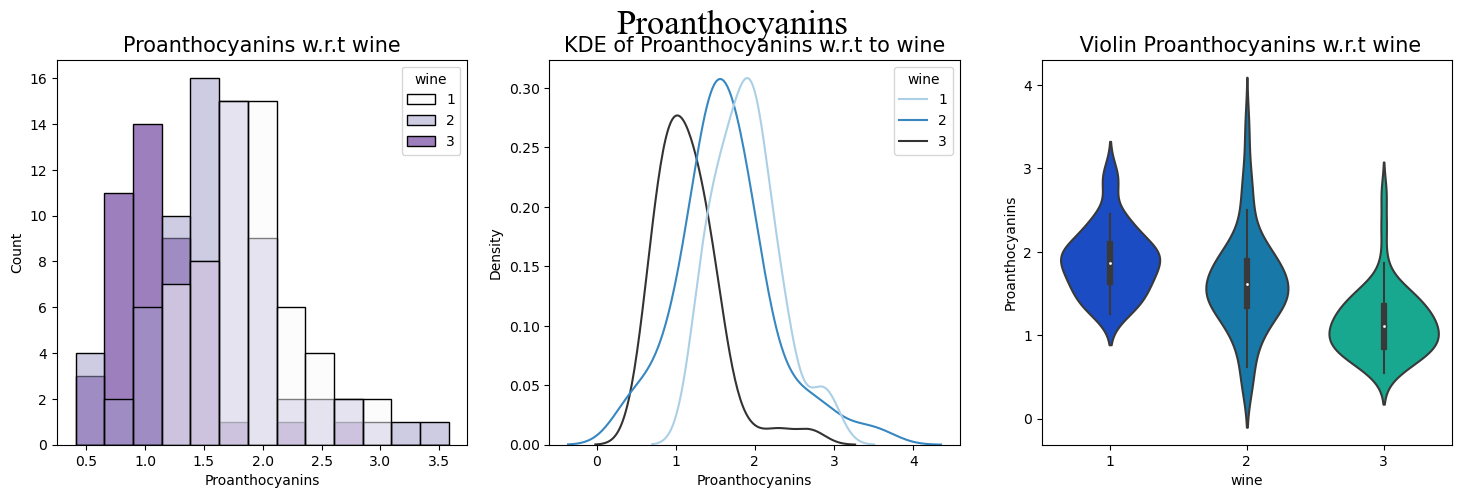

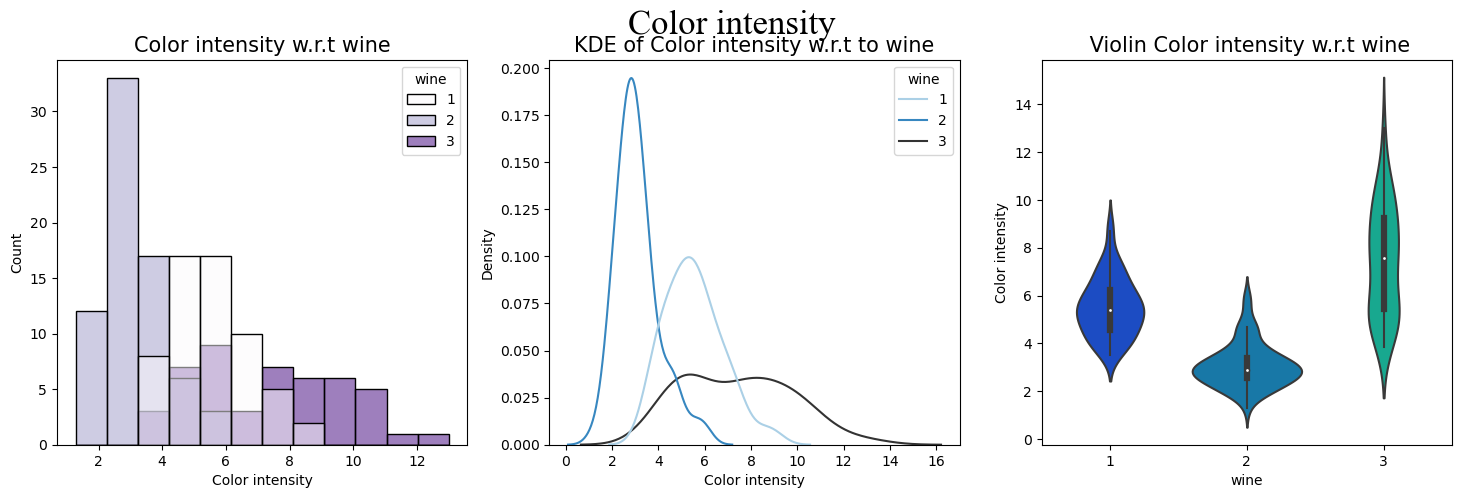

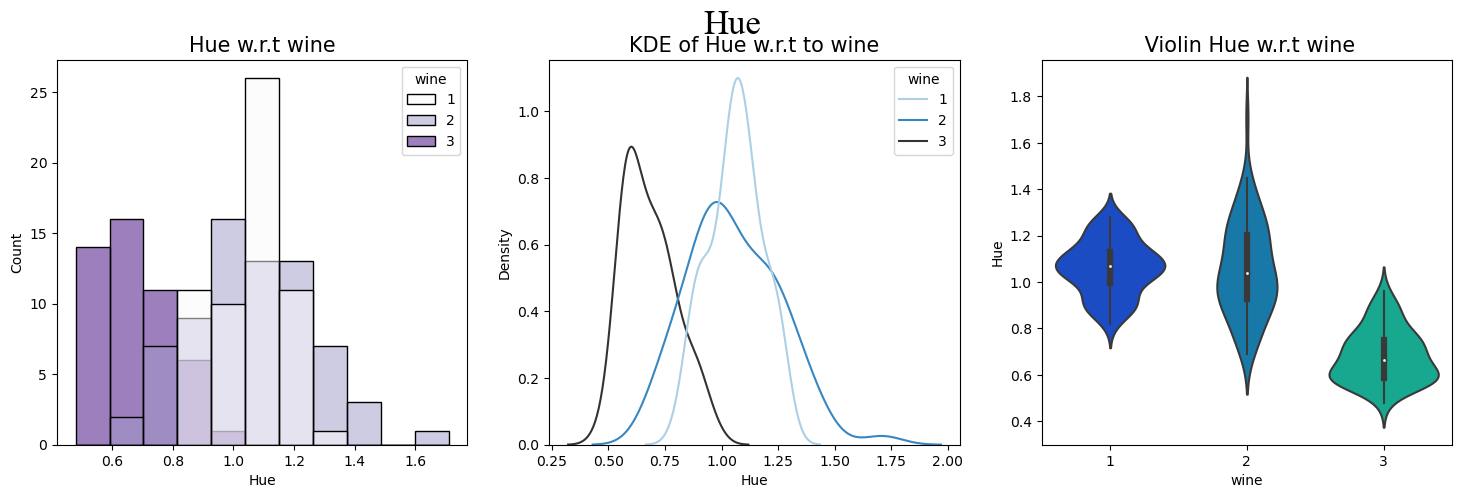

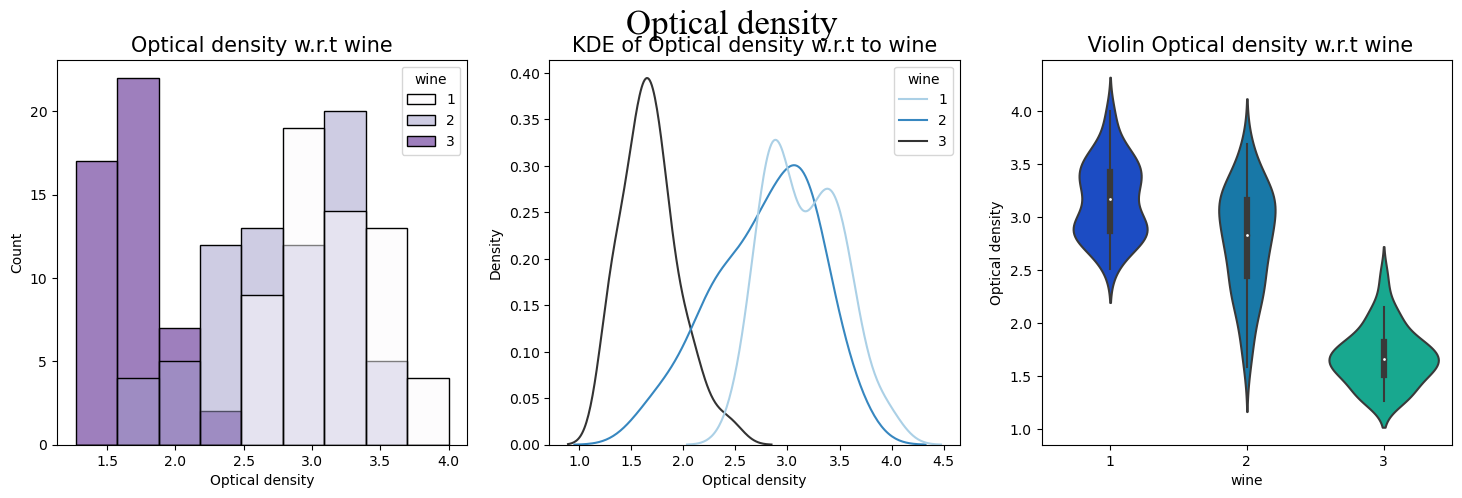

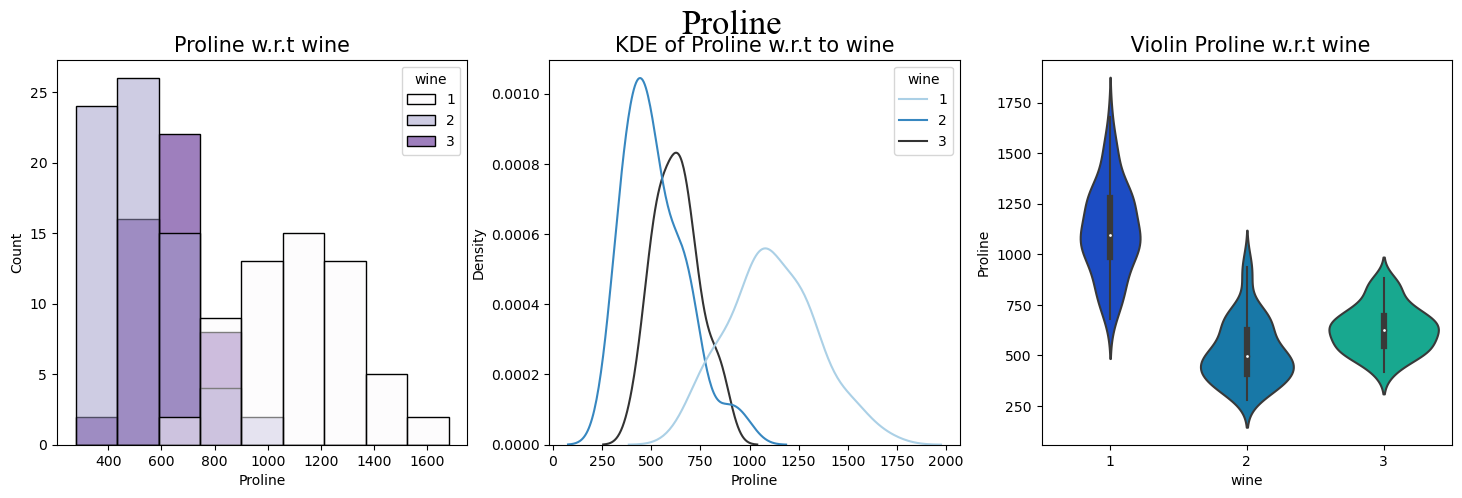

In [21]:
# We defined a list of columns 'cols' above.
for i in range(len(cols)):
    # Plotting the data for each feature with respect to wine category with a color palette
    # Also, Take time to analyse each distribution and frame inferences and the changes
    # Note the intuition of mean, median and modes along with std, variance, skewness and kurtosis
    plot_data_wine(cols[i])

In [22]:
sns.violinplot(data=df,y='Malic acid',x='wine',palette='Greens_r')
#ax = sns.boxplot(x="day", y="total_bill", hue="smoker", data=tips, palette="Set3")

<AxesSubplot:xlabel='wine', ylabel='Malic acid'>

In [23]:
# Lets plot pairplots to understand the feature relations
# Lets divide the dataframe into two 
df1 = df[['wine', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash','Magnesium', 'Total phenols']]
sns.pairplot(df1,hue='wine',palette='RdBu_d')
plt.show()

In [24]:
# Pair plot with the other half
df2 = df[['wine','Flavanoids', 'Nonflavanoid phenols','Proanthocyanins', 'Color intensity', 'Hue', 'Optical density','Proline']]
sns.pairplot(df2,hue='wine',palette='Blues')
plt.show()

## <mark>  <span style="color:darkblue">Automated EDA</span> </mark>     <a class="anchor" id="Automated_EDA"></a>

In [26]:
# Now that we have seen manual plotting and Data preprocessing. Lets see the inferences from automated libraries
# We shall use Dataprep, Pandas-Profiling, Sweetviz libraries now

In [27]:
# Install the below libraries using the below code
# pip install dataprep

<a class="anchor" id="dataprep"></a>

In [ ]:
# Unhash to run it
# import dataprep
# from dataprep.eda import create_report
# create_report(df)

<a class="anchor" id="pandas_profiling"></a>

In [ ]:
# pip install pandas-profiling

<a class="anchor" id="sweetviz"></a>

In [ ]:
# pip install sweetviz 

In [1]:
# Unhash to run it
# from pandas_profiling import ProfileReport
# profile = ProfileReport(df)
# profile.to_file('output.html')
# profile

In [2]:
# Unhash to run it
# import sweetviz as sv
# my_report = sv.analyze(df)
# my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"
# check the local depository to open this again

## <mark><span style="color:Purple">Feature Engineering </span> </mark>     <a class="anchor" id="Feature_Engineering"></a>

In [33]:
df.head(2)

,wine,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,Optical density,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050


## <mark> <span style="color:green">Correlation </span> </mark>     <a class="anchor" id="correlation"></a>

In [34]:
# Style change - Look for more styles - 'ggplot','dark_background','Solarize_Light2','bmh','grayscale' etc..,
plt.style.use('fivethirtyeight')

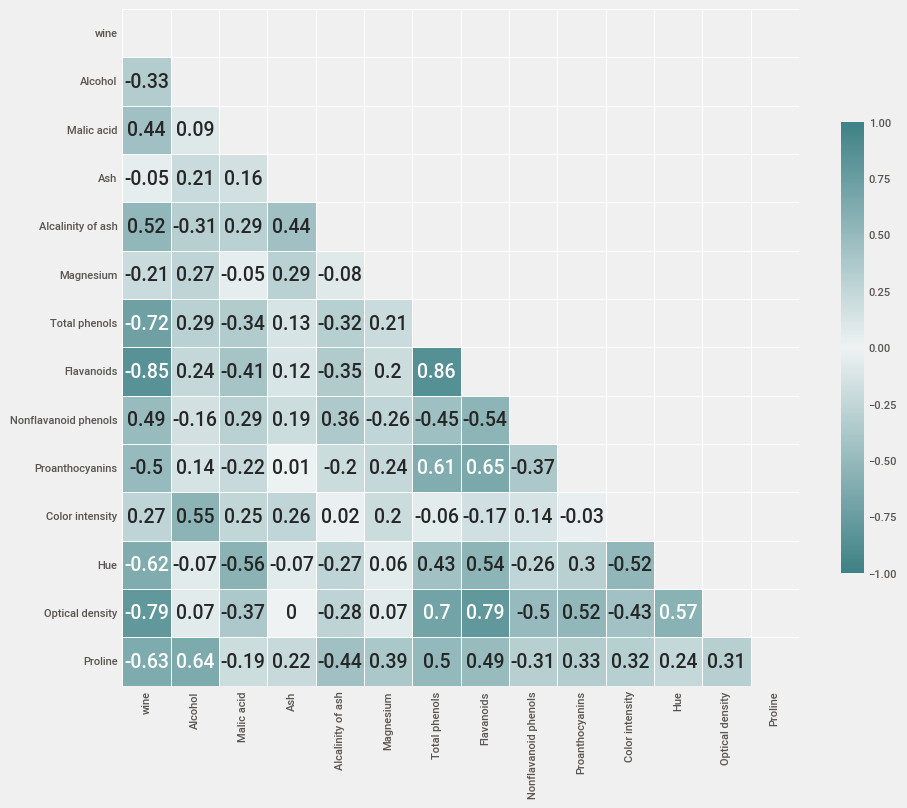

In [35]:
corr = df.corr().round(2)
mask = np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
fig11,ax11 = plt.subplots(figsize=(10,10))
cmap = sns.diverging_palette(200,200,as_cmap=True)
sns.heatmap(corr,mask=mask,cmap=cmap,vmin=-1,vmax=1,center=0,square=True,linewidths=.5,cbar_kws={"shrink":0.5},annot=True)
plt.tight_layout()
plt.show()

## <mark><span style="color:Brown">Feature Scaling</span></mark>    <a class="anchor" id="Feature_Scaling"></a>


In [36]:
# We should scale the data to bring the data to uniform scale
# import Scaling libraries; Use any of the Scalers to scale the data
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Scaling using Standard deviation
ss = StandardScaler()
# Converting the array output of Standardization to a dataframe
df.iloc[:,1:] = ss.fit_transform(df.iloc[:,1:])
df.head()

,wine,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,Optical density,Proline
0,1,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,1,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,1,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


##   <mark><span style="color:orange">Feature Importances</span></mark>     <a class="anchor" id="Feature_Importance"></a>

 <mark>**1. Using Decision tree** </mark> <a class="anchor" id="decision_tree"></a>

In [37]:
# For finding important features, we need to seperate the dataframe
X = df.drop('wine',axis=1)
y = df['wine']

In [38]:
# Decision Tree instance
dtree = DecisionTreeClassifier()
# fit the model
dtree.fit(X,y)
# Find the important features using feature_importances_
Important_features_tree = dtree.feature_importances_
Important_features_tree

array([0.01257056, 0.02048135, 0.01422316, 0.        , 0.        ,
       0.        , 0.16704836, 0.        , 0.        , 0.03297845,
       0.05818509, 0.31204257, 0.38247045])

In [39]:
# Attach the columns of X to the feature importance labels
columns = X.columns
# Converting into a dataframe
feature_importance_tree = pd.DataFrame(Important_features_tree)
# Attach columns to it
feature_importance_tree['columns'] = columns.T

In [ ]:
# Lets plot a barplot to visualize the important features
sns.set_style('whitegrid')
# Bar plot
sns.barplot(data=feature_importance_tree,x='columns',y=feature_importance_tree[0])
# rotate the labels
plt.xticks(rotation=90)
plt.show()

<mark>**2. Using Random Forest**</mark>  <a class="anchor" id="random_forest"></a>

In [41]:
# Random Forest instance
rf = RandomForestClassifier()
# fit the model
rf.fit(X,y)
# Find the important features using feature_importances_
Important_features_rf = rf.feature_importances_
Important_features_rf

array([0.13972531, 0.02328976, 0.01287451, 0.03394534, 0.02224391,
       0.0472332 , 0.17371547, 0.01104256, 0.02510951, 0.15234914,
       0.07100956, 0.11710895, 0.17035278])

In [42]:
# Attach the columns of X to the feature importance labels
columns = X.columns
# Converting into a dataframe
feature_importance_rf = pd.DataFrame(Important_features_rf)
# Attach columns to it
feature_importance_rf['columns'] = columns.T

In [ ]:
# Lets plot a barplot to visualize the important features
sns.set_style('whitegrid')
# Bar plot
sns.barplot(data=feature_importance_rf,x='columns',y=feature_importance_rf[0])
# rotate the labels
plt.xticks(rotation=90)
plt.show()

## <mark> <span  style= " font-family: Times New Roman"> Model Building  </span> </mark> <a class="anchor" id="Model_Building"></a>

### <mark>Train_test_data split </mark> 

In [44]:
# Splitting the X,y into train and test data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(142, 13) (36, 13) (142,) (36,)


In [45]:
# Lets first create a basic AdaBoost instance and build a model
#The most important parameters are base_estimator, n_estimators, and learning_rate
# AdaBoost has its default base estimator as decision tree
# Create AdaBoost classifier object with 300 decision tree estimator at a learning rate=1
abc1 =AdaBoostClassifier(n_estimators=300, base_estimator=dtree,learning_rate=1)
# Train Adaboost Classifer
model1 = abc1.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = model1.predict(X_test)

In [46]:
dict_results = {'Predicted':y_pred,'Actual':y_test}
results = pd.DataFrame(dict_results)
results

,Predicted,Actual
69,2,2
103,2,2
20,1,1
116,2,2
56,1,1
97,1,2
117,2,2
39,1,1
172,3,3
10,1,1


In [47]:
pd.crosstab(y_pred,y_test)

wine,1,2,3
row_0,,,
1,10,2,0
2,0,14,0
3,0,2,8


In [48]:
# We will perform the same operation using Support Vector machines
svc=SVC(probability=True, kernel='linear')
# Create adaboost classifer object using SVC
abc =AdaBoostClassifier(n_estimators=300, base_estimator=svc,learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)
#Predict the response for test dataset
y_pred_svc = model.predict(X_test)

In [49]:
dict_results = {'Predicted':y_pred_svc,'Actual':y_test}
results = pd.DataFrame(dict_results)
results

,Predicted,Actual
69,2,2
103,2,2
20,1,1
116,2,2
56,1,1
97,2,2
117,2,2
39,1,1
172,3,3
10,1,1


In [50]:
# Crosstab- groups every feature and counts it
pd.crosstab(y_pred,y_test)

wine,1,2,3
row_0,,,
1,10,2,0
2,0,14,0
3,0,2,8


In [51]:
# We can also plot feature importances using AdaBoost model
def plot_feature_importance(importance,names,model_type):
    
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    
    #Add chart labels
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

In [ ]:
plot_feature_importance(abc1.feature_importances_,X.columns,'ADA BOOST')
plt.show()

In [53]:
 abc1.feature_importances_

array([0.        , 0.        , 0.        , 0.00489142, 0.        ,
       0.01595028, 0.04009654, 0.        , 0.        , 0.07962575,
       0.02083301, 0.39628955, 0.44231345])

## <mark> <span  style= " font-family: Times New Roman"> Evaluation metrics  </span></mark>  <a class="anchor" id="Evaluation_metrics"></a>
     

In [54]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy with Dtree:",metrics.accuracy_score(y_test, y_pred))
print("Accuracy with SVC:",metrics.accuracy_score(y_test,y_pred_svc))

Accuracy with Dtree: 0.8888888888888888
Accuracy with SVC: 0.9444444444444444


In [55]:
# Confusion Matrix for dtree model
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model,X_test,y_test,values_format='d',display_labels=['1','2','3'])

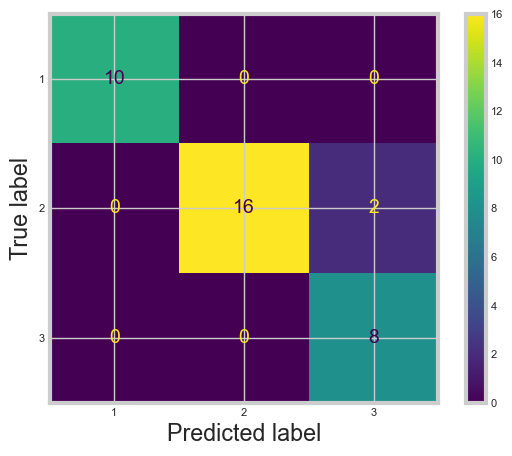

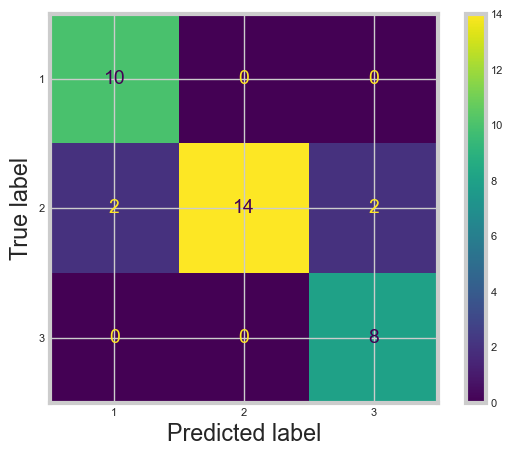

In [56]:
# Confusion matrix for SVM model
plot_confusion_matrix(model1,X_test,y_test,values_format='d',display_labels=['1','2','3'])
plt.show()

In [57]:
# Funtion to calculate True Positive Rate and False Positive Rate
def calculate_tpr_fpr(y_real, y_pred):
    # Calculates the confusion matrix and recover each element
    cm = confusion_matrix(y_real, y_pred)
    # True Negative
    TN = cm[0, 0]
    # False Positive
    FP = cm[0, 1]
    # False Negative
    FN = cm[1, 0]
    # True Positive
    TP = cm[1, 1]
    # Calculates TPR and FPR
    tpr =  TP/(TP + FN) # sensitivity - true positive rate
    fpr = 1 - TN/(TN+FP) # 1-specificity - false positive rate
    return tpr, fpr

# Function to retrieve ROC Coordinates
def get_all_roc_coordinates(y_real, y_proba):
    # making a list of True positive rate values
    tpr_list = [0]
    # making of list of False positive rate values
    fpr_list = [0]
    # for all the values in the probability list for the test data calculated
    for i in range(len(y_proba)):
        # We define a threshold probability
        threshold = y_proba[i]
        # If its next values are greater than threshold, its 1 else 0
        y_pred = y_proba >= threshold
        # Use the above function to get the TPR and FPR values
        tpr, fpr = calculate_tpr_fpr(y_real, y_pred)
        # Append them to this list
        tpr_list.append(tpr)
        fpr_list.append(fpr)
        # Finally return the list as these are the axes for roc curves
    return tpr_list, fpr_list

# Function to plot ROC Curve from the above lists
def plot_roc_curve(tpr, fpr, scatter = True, ax = None):
    if ax == None:
        # By default, size the figure to plot if there are no data given to axes
        plt.figure(figsize = (5, 5))
        ax = plt.axes()
        
    if scatter:
        sns.scatterplot(x = fpr, y = tpr, ax = ax)
        # Plot a lineplot with the lists retrieved earlier
    sns.lineplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = [0, 1], y = [0, 1], color = 'green', ax = ax)
    # set x-axis and y-axis limits
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    # Set labels for x-axes and y-axes
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

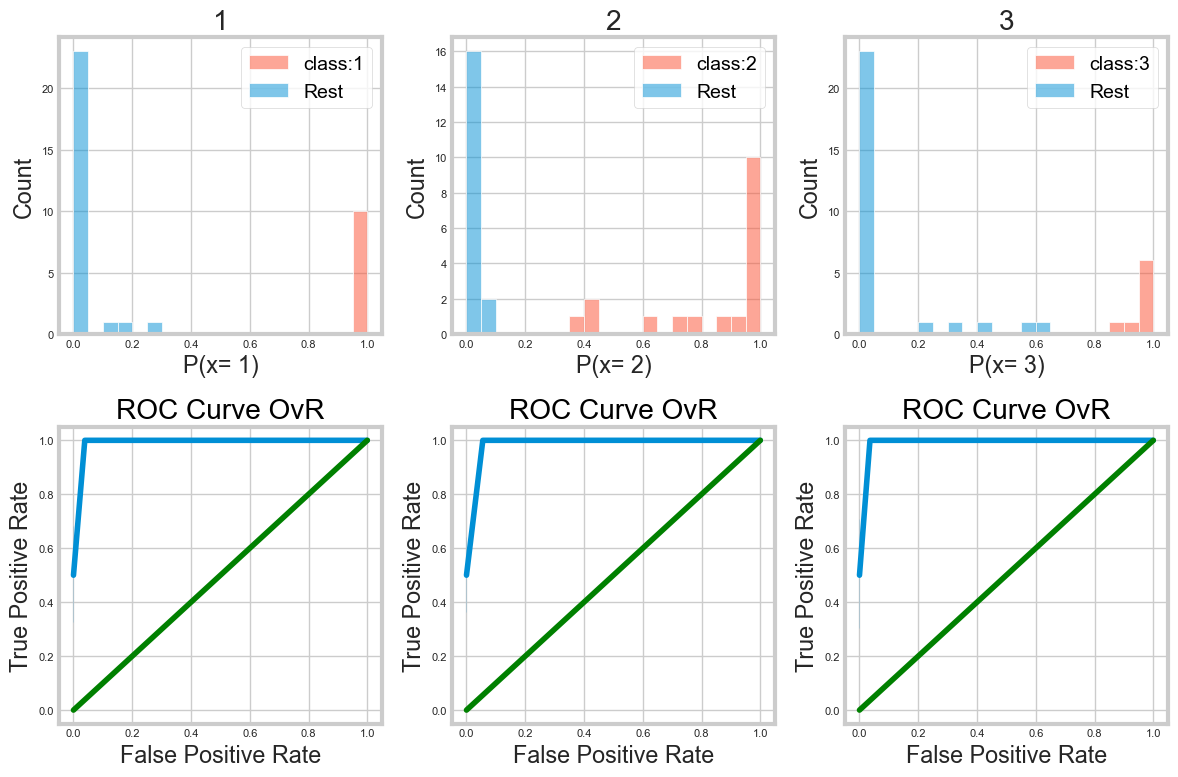

In [58]:
# Plot ROC-AUC Curve for dtree model
# Since it is a multiclass model, we will use Binary format that One-vs-One or One-vs-Rest models
# One-vs-Rest (OvR) explains the class against the rest of the model
# One-vs-One (OvO) explains the class against other class
# Plots the Probability Distributions and the ROC Curves One vs Rest

plt.figure(figsize=(12,8))
# Defining the bins for the histogram
bins = [i/20 for i in range(20)]+[1]
# list of classes in the model
classes = model.classes_
# probability of data belonging to the each class
y_proba = model.predict_proba(X_test)
roc_auc_ovr = {}

# For every class,
for i in range(len(classes)):
    c = classes[i]
    
    # Take a copy of the X-test
    df_aux = X_test.copy()
    # If the data belongs to that class its 1, else 0
    # We are converting the multiclass classification to the Binary format - This is OvR classification
    df_aux['class'] = [1 if y==c else 0 for y in y_test]
    # probability value of that class is attached to the dataframe
    df_aux['prob'] = y_proba[:,i]
    # set the index to default
    df_aux = df_aux.reset_index(drop=True)
    
    # Plots the probability distribution for the class and the rest
    # subplots- row, columns, iteration number
    ax = plt.subplot(2,3,i+1)
    # Histogram for each class given probability
    sns.histplot(x='prob',data=df_aux,hue='class',color='b',ax=ax,bins=bins)
    ax.set_title(c)
    # Legend set for every plot
    leg = ax.legend([f"class:{c}","Rest"])
    for text in leg.get_texts():
        text.set_color("black")
    ax.set_xlabel(f"P(x= {c})")
    
    # Calculates the ROC coordinates and plots the ROC curves
    ax_bottom = plt.subplot(2,3,i+4)
    # plot roc curve using above defined functions
    tpr,fpr = get_all_roc_coordinates(df_aux['class'],df_aux['prob'])
    plot_roc_curve(tpr,fpr,scatter=False,ax=ax_bottom)
    bottom = ax_bottom.set_title("ROC Curve OvR",color='black')
    
    # Calculates the ROC AUC OvR
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'],df_aux['prob'])
plt.tight_layout()  
plt.show()

In [59]:
# Displays the ROC AUC for each class
# Our dataset is too small for AdaBoost algorithm, the same for the larger datasets will not be same
avg_roc_auc = 0
i = 0
for k in roc_auc_ovr:
    # iterate the values
    avg_roc_auc += roc_auc_ovr[k]
    i += 1
    print(f"{k} ROC AUC OvR: {roc_auc_ovr[k]:.4f}")
print(f"average ROC AUC OvR: {avg_roc_auc/i:.4f}")

1 ROC AUC OvR: 1.0000
2 ROC AUC OvR: 1.0000
3 ROC AUC OvR: 1.0000
average ROC AUC OvR: 1.0000


<mark>**We can do the same for the model with SVC base estimators** </mark>

In [60]:
# F1-score is the harmonic mean of the precision and recall to balance the trade-off between them
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average=None)

array([0.90909091, 0.875     , 0.88888889])

In [61]:
# Preparing classification report for the model with dtree
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.83      1.00      0.91        10
           2       1.00      0.78      0.88        18
           3       0.80      1.00      0.89         8

    accuracy                           0.89        36
   macro avg       0.88      0.93      0.89        36
weighted avg       0.91      0.89      0.89        36



In [62]:
# Preparing classification report for the model with SVC
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_svc))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      0.89      0.94        18
           3       0.80      1.00      0.89         8

    accuracy                           0.94        36
   macro avg       0.93      0.96      0.94        36
weighted avg       0.96      0.94      0.95        36



In [63]:
XX = ss.fit_transform(df.drop('wine',axis=1))
XX

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [64]:
df.head(2)

,wine,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,Optical density,Proline
0,1,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242


## <mark> <span  style= " font-family: Times New Roman"> Decision Boundary  </span></mark> <a class="anchor" id="Decision_boundaries"></a>

#### <mark> We will now try to plot Decision boundaries for DecisionTreeClassifier, RandomForestClassifier and AdaBoost Classifier and see the difference </mark>

RandomForest with 100 estimators with features [0, 7] has a score of 0.9943820224719101
AdaBoost with 100 estimators with features [0, 7] has a score of 0.9943820224719101
RandomForest with 100 estimators with features [2, 3] has a score of 0.9943820224719101
AdaBoost with 100 estimators with features [2, 3] has a score of 0.9269662921348315
RandomForest with 100 estimators with features [1, 6] has a score of 1.0
AdaBoost with 100 estimators with features [1, 6] has a score of 1.0
RandomForest with 100 estimators with features [5, 9] has a score of 1.0
AdaBoost with 100 estimators with features [5, 9] has a score of 1.0


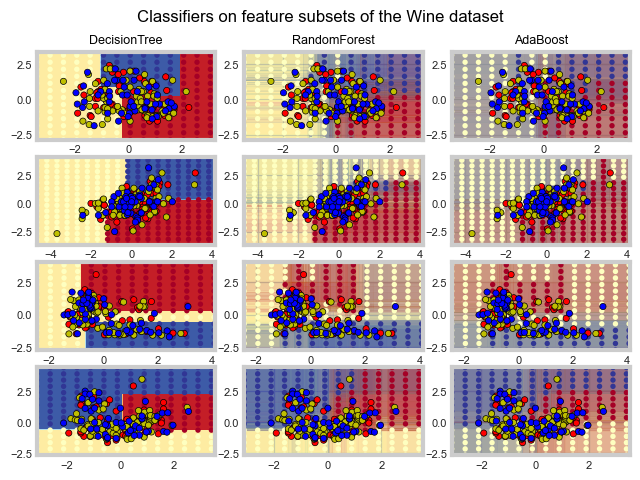

In [65]:
from matplotlib.colors import ListedColormap
from sklearn.ensemble import RandomForestClassifier

n_classes = 3; # We have three classes
n_estimators = 100; # Consider 300 estimators decision tree by default
cmap = plt.cm.RdYlBu # selecting cmap
plot_step = 0.02  # fine step width for decision surface contours
plot_step_coarser = 0.5  # step widths for coarse classifier guesses
RANDOM_SEED = 13  # fix the seed on each iteration
plot_idx = 1

models = [DecisionTreeClassifier(max_depth=3),RandomForestClassifier(n_estimators=n_estimators),
    AdaBoostClassifier(n_estimators=n_estimators, base_estimator = DecisionTreeClassifier(max_depth=3), learning_rate=1,algorithm='SAMME')]

pqr = ss.fit_transform(df.drop('wine',axis=1))

for pair in ([0,7], [2,3], [1,6], [5,9]):
    for model in models:
        # We only take the two corresponding features
        XX = pqr[:,pair]
        yy = np.asarray(df['wine'])

        # Shuffle
        idx = np.arange(XX.shape[0]) # No of rows
        np.random.seed(RANDOM_SEED) # a seed value(random) for a random value generator
        np.random.shuffle(idx)
        XX = XX[idx]
        yy = yy[idx]
        # Training the model
        model.fit(XX, yy)

        # getting score for the model
        scores = model.score(XX,yy)
        # Output of the below will be statement similar to  - ["<class 'sklearn", 'ensemble', '_weight_boosting', "AdaBoostClassifier'>"]
        # Example, We are processing to get title 'AdaBoost' from the list of strings
        # slicing away the useless parts of the string 
        model_title = str(type(model)).split(".")[-1][:-2][: -len("Classifier")]
        model_details = model_title
        # If the model has the attributes 'estimators_' (means if its true): then proceed...
        if hasattr(model, "estimators_"):
            # Adding the models estimators to the title
            model_details += " with {} estimators".format(len(model.estimators_))
            # printing the scores of the model with the title framed
            print(model_details + " with features", pair, "has a score of", scores)
        
        # defining subplots for each pair of features with the model 
        plt.subplot(4, 3, plot_idx)
        # If plot index is less than the limit:
        if plot_idx <= len(models):
            # Add a title at the top of each column
            plt.title(model_title, fontsize=9,color='black')
            
        # Now plot the decision boundary using a fine mesh as input to a filled contour plot
        # Of the pair of features, first feature --> xx, second feature --> yy
        x_min, x_max = XX[:, 0].min() - 1, XX[:, 0].max() + 1
        y_min, y_max = XX[:, 1].min() - 1, XX[:, 1].max() + 1
        # Building a meshgrid for the plots between the range with plot_step defined
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
        
        
        # Plot either a single DecisionTreeClassifier or alpha blend the decision surfaces of the ensemble of classifiers
        # If there is an instance of this model:
        if isinstance(model, DecisionTreeClassifier):
            # np.c_ : Translates slice objects to concatenation along the second axis.
            # Example, [[1,2,3],[4,5,6]] --> [[1,4],[2,5],[3,6]] using np.c_ function
            Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
            # Reshaping to perfectly fit in the data
            Z = Z.reshape(xx.shape)
            # Contouring done here
            cs = plt.contourf(xx, yy, Z, cmap=cmap)
        else:
            # Choose alpha blend level with respect to the number of estimators
            # that are in use (noting that AdaBoost can use fewer estimators than its maximum if it achieves a good enough fit early on)
            estimator_alpha = 1.0 / len(model.estimators_)
            for tree in model.estimators_:
                # ravel() --> gives the flattened array for the input
                Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
                Z = Z.reshape(xx.shape)
                cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cmap)
                
        # Build a coarser grid to plot a set of ensemble classifications to show how these are different to what we see in the decision surfaces
        # These points are regularly space and do not have a black outline
        xx_coarser, yy_coarser = np.meshgrid(np.arange(x_min, x_max, plot_step_coarser),np.arange(y_min, y_max, plot_step_coarser),)
        Z_points_coarser = model.predict(np.c_[xx_coarser.ravel(), yy_coarser.ravel()]).reshape(xx_coarser.shape)
        cs_points = plt.scatter(xx_coarser,yy_coarser,s=15,c=Z_points_coarser,cmap=cmap,edgecolors="none")

        # Plot the training points, these are clustered together and have a
        # black outline
        plt.scatter(XX[:, 0],XX[:, 1],c=y,cmap=ListedColormap(["r", "y", "b"]),edgecolor="k",s=20)
        plot_idx += 1  # move on to the next plot in sequence

plt.suptitle("Classifiers on feature subsets of the Wine dataset", fontsize=12,color='black')
plt.axis("tight")
plt.tight_layout(h_pad=0.1, w_pad=0.1, pad=0.5)
plt.show()

##  <mark> <span  style= " font-family: Times New Roman"> Hyperparameter tuning  </span></mark> <a class="anchor" id="Hyperparameter_Tuning"></a>

In [66]:
df.head(2)

,wine,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,Optical density,Proline
0,1,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242


In [67]:
# explore adaboost ensemble number of trees effect on performance
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

# get a list of models to evaluate
def get_models():
    # Models with different estimators are taken into a dictionary
    models = dict()
    # define number of trees to consider
    n_trees = [10, 50, 100, 500, 1000, 2000]
    for n in n_trees:
        # Appending them 
        models[str(n)] = AdaBoostClassifier(n_estimators=n)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X, y)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>10 0.905 (0.105)
>50 0.903 (0.104)
>100 0.901 (0.104)
>500 0.897 (0.103)
>1000 0.897 (0.103)
>2000 0.897 (0.103)


In [ ]:
# plot model performance for comparison
import plotly.graph_objects as go
# Initiate graph objects
fig = go.Figure()
for col in range(len(results)):
    # Adding subplots
    fig.add_trace(go.Box(y=results[col], name=str(names[col])))

# Update xlabels and ylabels
fig.update_xaxes(title_text = "No of n_estimators",title_font = {"size": 20},title_standoff = 25)
fig.update_yaxes(title_text = "Classification accuracy",title_standoff = 25)
fig.show()

In [ ]:
# Building a model for observing accuracies for different depths with different cross validation models
# get a list of models to evaluate
def get_models():
    models = dict()
    # explore depths from 1 to 10
    for i in range(1,11):
        # define base model
        base = DecisionTreeClassifier(max_depth=i)
        # define ensemble model
        models[str(i)] = AdaBoostClassifier(base_estimator=base)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X, y)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

In [ ]:
# Initiate graph objects
fig1 = go.Figure()
for col in range(len(results)):
    # Adding subplots
    fig1.add_trace(go.Box(y=results[col], name=str(names[col])))

# Update xlabels and ylabels
fig1.update_xaxes(title_text = "Train depths",title_font = {"size": 20},title_standoff = 25)
fig1.update_yaxes(title_text = "Classification accuracy",title_standoff = 25)
fig1.show()

In [ ]:
# Finding best learning rate 
# get a list of models to evaluate
def get_models():
    models = dict()
# explore learning rates from 0.1 to 2 in 0.1 increments
   for i in np.arange(0.1, 2.1, 0.1):
        key = '%.3f' % i
        models[key] = AdaBoostClassifier(learning_rate=i)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X, y)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison

In [ ]:
# Initiate graph objects
fig2 = go.Figure()
for col in range(len(results)):
    # Adding subplots
    fig2.add_trace(go.Box(y=results[col], name=str(names[col])))

# Update xlabels and ylabels
fig2.update_xaxes(title_text = "Learning rate",title_font = {"size": 20},title_standoff = 25)
fig2.update_yaxes(title_text = "Classification accuracy",title_standoff = 25)
fig2.show()

**We observed the best range of Hyperparameters to check the accuracy maxima**

In [ ]:
# GridSearchCV
from sklearn.model_selection import GridSearchCV
# define the model with default hyperparameters
model = AdaBoostClassifier()
# define the grid of values to search
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
# execute the grid search
grid_result = grid_search.fit(X, y)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
fig9 = go.Figure()
fig9.add_trace(go.Scatter(y=means,mode='lines+markers',name='Means of the results'))
fig9.add_trace(go.Scatter(y=stds,mode='lines+markers',name='Standard Deviations results'))
fig9.update_layout(title="Means and Stds of results")
fig9.show()